# Random Values Imputition
1. In random values imputition we can fil the missing values by using select the random nbr of the emtire col.

# Import packages

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [128]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [129]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

# Check Distrubution

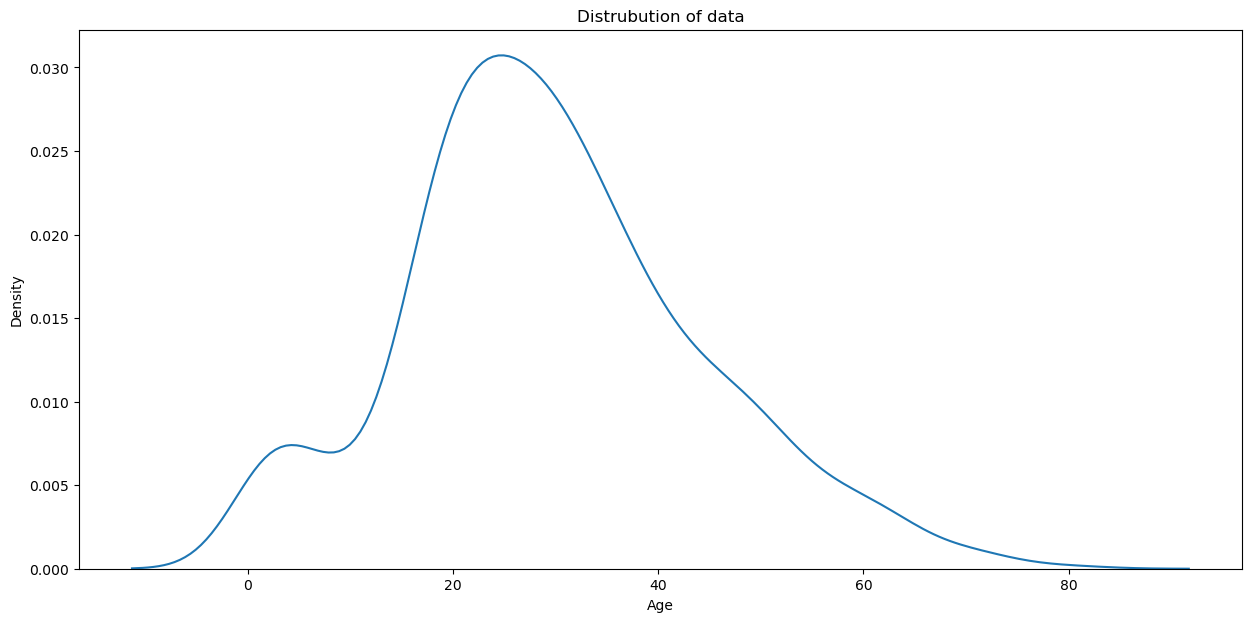

In [130]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of data")
sns.kdeplot(df['Age'])
plt.show()

**we know that age contan missing 177 missing values now fill the valeus using missing indicatore**

# Train test split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='Survived'),df['Survived'],test_size=0.2,random_state=42)

# Fill the missing values using `Random Value Imputition`

In [133]:
x_train["Age_imputed"]=x_train['Age']
x_test["Age_imputed"]=x_test['Age']

# Get the missing value index

In [134]:
x_train_missing_index=x_train[x_train['Age_imputed'].isnull()]['Age_imputed'].index
x_test_missing_index=x_test[x_test['Age_imputed'].isnull()]['Age_imputed'].index
x_test_missing_index

Index([709, 300, 485, 653, 538, 793, 235, 198, 739, 837, 790, 168, 196, 778,
       250, 388,  76, 669, 849, 527, 578, 359,  65, 481, 306,  31, 584, 109,
        77, 611, 643,  82, 507, 375,   5, 457, 773],
      dtype='int64')

# Now Get the random sample values

In [151]:
x_train_sample=x_train['Age_imputed'].dropna().sample(x_train['Age_imputed'].isnull().sum(),random_state=1).values
x_test_sample=x_test['Age_imputed'].dropna().sample(x_test['Age_imputed'].isnull().sum(),random_state=1).values

In [152]:
x_test_sample

array([28. , 44. , 21. , 16. , 18. , 32. , 27. , 18. , 30. , 40. , 65. ,
       21. , 19. , 20.5, 28. , 24. , 19. , 47. , 64. , 20. , 52. , 40. ,
       66. , 22. , 26. , 11. , 45. , 48. , 40. , 36. , 34. , 27. , 38. ,
        5. , 21. , 41. , 19. ])

In [153]:
x_train_sample

array([20.  , 35.  , 19.  , 19.  ,  3.  ,  1.  , 26.  , 33.  , 24.  ,
       42.  , 47.  , 44.  ,  0.75, 53.  , 26.  , 28.  , 48.  , 24.  ,
       64.  , 31.  , 29.  , 24.  , 39.  , 54.  , 39.  , 50.  , 49.  ,
       30.  ,  1.  ,  5.  , 19.  , 34.  , 27.  ,  3.  , 28.  , 17.  ,
       26.  , 58.  , 27.  , 48.  , 19.  , 56.  , 20.  , 27.  , 27.  ,
       55.  , 22.  , 16.  , 18.  , 24.5 , 41.  ,  9.  , 32.  , 35.  ,
       33.  , 59.  , 45.5 ,  2.  ,  2.  , 19.  , 26.  , 30.  , 28.  ,
       42.  , 28.  , 36.  , 28.  , 27.  , 31.  ,  4.  , 23.  , 58.  ,
       44.  , 33.  , 35.  , 27.  , 24.  , 60.  , 22.  , 16.  , 22.  ,
       52.  , 21.  , 34.  , 24.  , 50.  , 36.  , 43.  , 42.  , 24.  ,
       59.  , 16.  , 37.  , 22.  , 25.  , 25.  , 25.  , 23.  , 32.  ,
       21.  , 14.  , 15.  , 24.  , 22.  , 19.  , 25.  , 55.5 , 26.  ,
       22.  , 48.  , 18.  , 22.  , 55.  , 19.  , 20.  ,  9.  , 25.  ,
       26.  , 40.  , 13.  , 47.  ,  0.42,  9.  ,  6.  , 54.  , 35.  ,
        6.  , 21.  ,

# Now Fill the values

In [154]:
x_train.loc[x_train_missing_index,"Age_imputed"]=train_sample
x_test.loc[x_test_missing_index,"Age_imputed"]=test_sample

# Check the value again

In [155]:
x_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

# conclussion
**we see that there is no missing value remain now check the distrubution again**

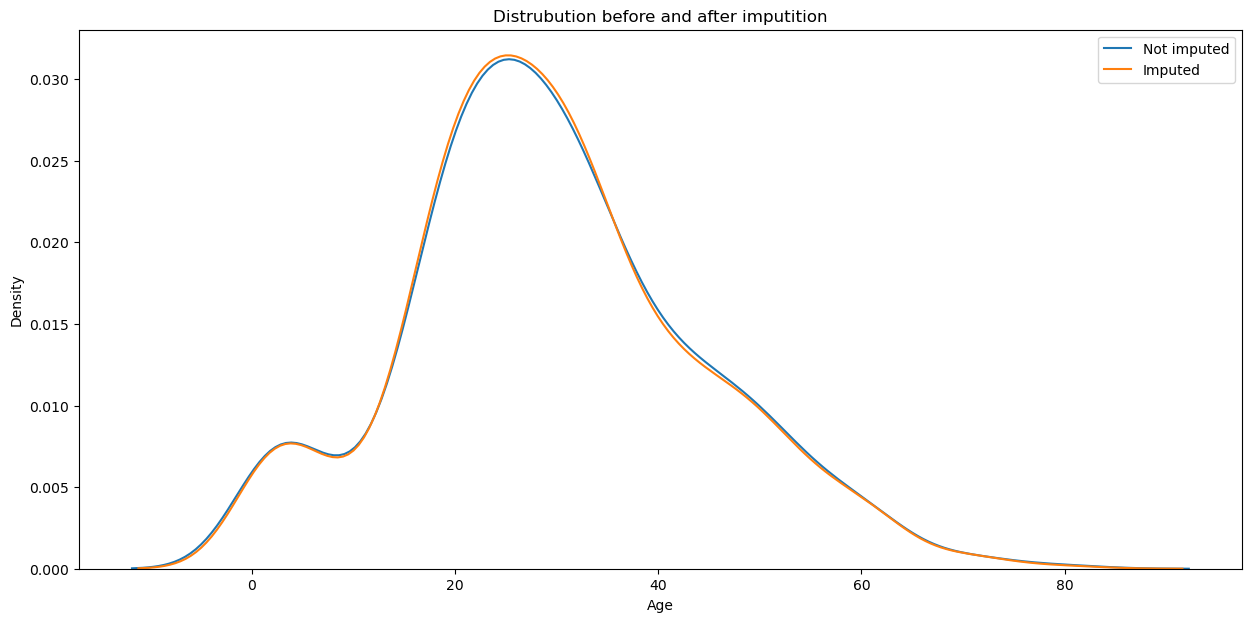

In [156]:
plt.figure(figsize=(15,7))
plt.title("Distrubution before and after imputition")
sns.kdeplot(x_train['Age'],label='Not imputed')
sns.kdeplot(x_train['Age_imputed'],label='Imputed')
plt.legend()

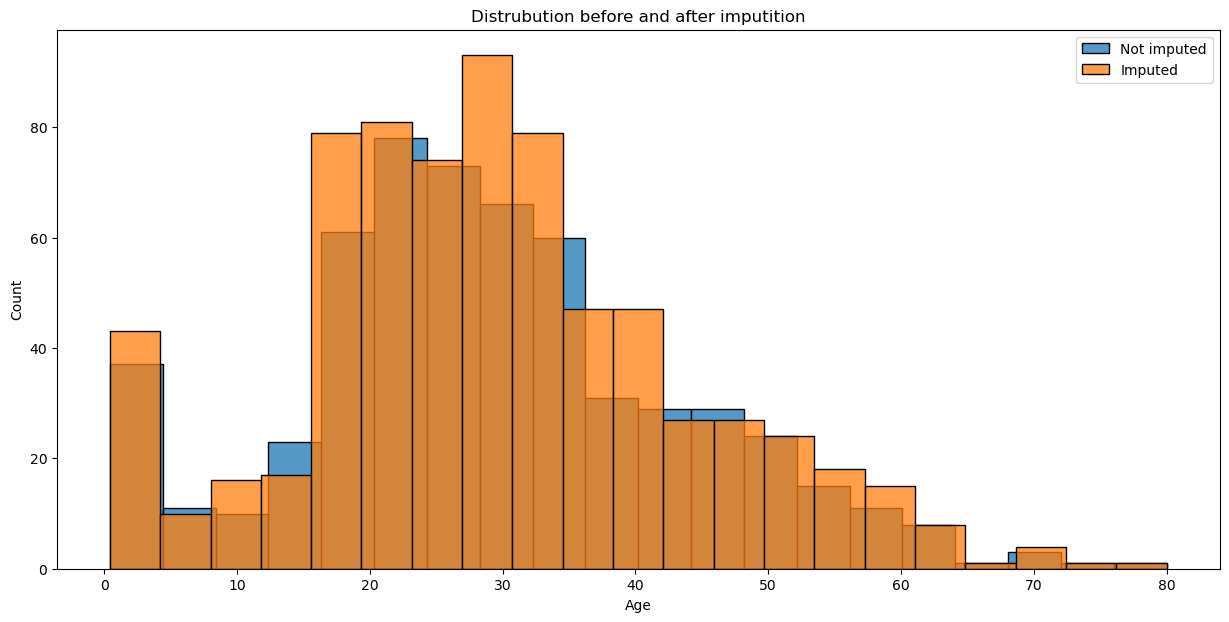

In [157]:
plt.figure(figsize=(15,7))
plt.title("Distrubution before and after imputition")
sns.histplot(x_train['Age'],label='Not imputed')
sns.histplot(x_train['Age_imputed'],label='Imputed')
plt.legend()

# Conclussion
1. **we can see that using random value imputition the distrubution of data should be same**
2. **But it is memory heavy for dopoyment**